In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [91]:
import os
os.chdir("C://Users//KOMAL//Desktop//data//Food_Forcasting")

In [92]:
data=pd.read_csv("train.csv")
test_data=pd.read_csv("test_food.csv")
center=pd.read_csv("fulfilment_center_info.csv")
meal=pd.read_csv("meal_info.csv")

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [94]:
data

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
...,...,...,...,...,...,...,...,...,...
456543,1271326,145,61,1543,484.09,484.09,0,0,68
456544,1062036,145,61,2304,482.09,482.09,0,0,42
456545,1110849,145,61,2664,237.68,321.07,0,0,501
456546,1147725,145,61,2569,243.50,313.34,0,0,729


In [95]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [96]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.8+ KB


In [97]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [98]:
center.city_code.loc[center.city_code==679]="679_A"

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [99]:
center.region_code.loc[center.region_code==56]="56_A"

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [100]:
center.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679_A,56_A,TYPE_A,3.7
1,13,590,56_A,TYPE_B,6.7
2,124,590,56_A,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [101]:
center.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     object 
 2   region_code  77 non-null     object 
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ KB


In [102]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 880.0+ bytes


In [103]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [104]:
data.meal_id.value_counts().count()

51

In [105]:
meal.meal_id.value_counts()

1558    1
1847    1
1971    1
2867    1
1198    1
1962    1
1062    1
1445    1
1571    1
1311    1
1438    1
2956    1
2581    1
2104    1
2707    1
2322    1
2577    1
2704    1
2444    1
1803    1
2826    1
2569    1
1543    1
2306    1
1207    1
2126    1
1525    1
1878    1
2290    1
1902    1
2539    1
1770    1
2664    1
1248    1
1247    1
1885    1
2139    1
1754    1
1109    1
2490    1
2640    1
1230    1
1993    1
2760    1
2631    1
1778    1
1216    1
1727    1
2494    1
2492    1
2304    1
Name: meal_id, dtype: int64

In [106]:
data.center_id.value_counts().count()

77

In [107]:
center.center_id.value_counts().count()

77

In [108]:
master=pd.concat([data, test_data])
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 32572
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 37.3 MB


In [109]:
master

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,1448490,1,55,2631,243.50,242.50,0,0,40.0
...,...,...,...,...,...,...,...,...,...
32568,1250239,155,61,1543,482.09,484.09,0,0,NaN
32569,1039516,155,61,2304,483.09,483.09,0,0,NaN
32570,1158107,155,61,2664,322.07,323.07,0,0,NaN
32571,1444235,155,61,2569,322.07,323.07,0,0,NaN


In [110]:
master=master.reset_index()

In [111]:
master

,index,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0,1379560,1,55,1885,136.83,152.29,0,0,177.0
1,1,1466964,1,55,1993,136.83,135.83,0,0,270.0
2,2,1346989,1,55,2539,134.86,135.86,0,0,189.0
3,3,1338232,1,55,2139,339.50,437.53,0,0,54.0
4,4,1448490,1,55,2631,243.50,242.50,0,0,40.0
...,...,...,...,...,...,...,...,...,...,...
489116,32568,1250239,155,61,1543,482.09,484.09,0,0,NaN
489117,32569,1039516,155,61,2304,483.09,483.09,0,0,NaN
489118,32570,1158107,155,61,2664,322.07,323.07,0,0,NaN
489119,32571,1444235,155,61,2569,322.07,323.07,0,0,NaN


In [112]:
master=master.drop('index', axis=1)

In [113]:
master=pd.merge(master,center, on="center_id")

In [114]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   city_code              489121 non-null  object 
 10  region_code            489121 non-null  object 
 11  center_type            489121 non-null  object 
 12  op_area                489121 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 46.6+ MB


In [115]:
master=pd.merge(master,meal, on="meal_id")
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     489121 non-null  int64  
 1   week                   489121 non-null  int64  
 2   center_id              489121 non-null  int64  
 3   meal_id                489121 non-null  int64  
 4   checkout_price         489121 non-null  float64
 5   base_price             489121 non-null  float64
 6   emailer_for_promotion  489121 non-null  int64  
 7   homepage_featured      489121 non-null  int64  
 8   num_orders             456548 non-null  float64
 9   city_code              489121 non-null  object 
 10  region_code            489121 non-null  object 
 11  center_type            489121 non-null  object 
 12  op_area                489121 non-null  float64
 13  category               489121 non-null  object 
 14  cuisine                489121 non-nu

In [116]:
master.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285.0,647,56_A,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148.0,647,56_A,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135.0,647,56_A,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175.0,647,56_A,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175.0,647,56_A,TYPE_C,2.0,Beverages,Thai


In [117]:
master=master.drop(['center_id','meal_id'], axis=1)

In [118]:
master.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,1018704,2,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,1196273,3,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,1116527,4,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,1343872,5,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai


In [119]:
master.id.nunique()

489121

In [120]:
master=master.drop(["id","week"], axis=1)

In [121]:
master

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
489116,583.03,581.03,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental
489117,582.03,582.03,0,1,NaN,473,77,TYPE_A,4.5,Fish,Continental
489118,629.53,629.53,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental
489119,629.53,629.53,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental


In [122]:
master.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai


In [123]:
master.isna().sum()

checkout_price               0
base_price                   0
emailer_for_promotion        0
homepage_featured            0
num_orders               32573
city_code                    0
region_code                  0
center_type                  0
op_area                      0
category                     0
cuisine                      0
dtype: int64

In [124]:
test_data.shape

(32573, 8)

In [125]:
print(master.city_code.nunique())
print(master.region_code.nunique())
print(master.center_type.nunique())
print(master.op_area.nunique())
print(master.cuisine.nunique())

51
8
3
30
4


### Removing outliers

### 1 base_price

In [126]:
master

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...
489116,583.03,581.03,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental
489117,582.03,582.03,0,1,NaN,473,77,TYPE_A,4.5,Fish,Continental
489118,629.53,629.53,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental
489119,629.53,629.53,0,0,NaN,473,77,TYPE_A,4.5,Fish,Continental


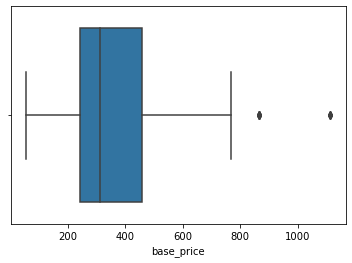

In [127]:
sns.boxplot(x=master["base_price"])

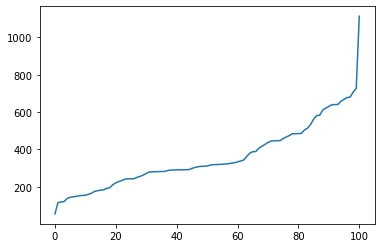

In [128]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master['base_price'].quantile(i/100))
    x.append(i)
plt.plot(x,quant)


In [129]:
quantile=np.array(quant)
quantile

array([  55.35,  115.46,  119.31,  121.25,  137.74,  144.56,  146.53,
        149.44,  152.29,  154.23,  155.26,  160.11,  165.93,  175.63,
        179.51,  182.39,  184.36,  192.06,  195.  ,  211.46,  221.22,
        228.92,  233.83,  241.53,  242.5 ,  243.5 ,  243.53,  251.23,
        256.08,  262.93,  271.63,  279.36,  280.33,  281.3 ,  281.33,
        282.33,  282.33,  287.15,  290.03,  290.03,  291.03,  291.03,
        291.06,  292.03,  292.03,  298.76,  303.64,  307.49,  309.43,
        310.43,  311.43,  316.22,  319.13,  319.19,  320.13,  321.13,
        322.07,  324.04,  326.89,  328.86,  333.71,  338.53,  343.38,
        361.87,  380.24,  388.  ,  389.03,  406.43,  417.13,  426.83,
        437.53,  445.23,  446.23,  447.23,  447.23,  458.81,  466.63,
        474.33,  484.03,  484.09,  485.03,  486.03,  504.43,  514.13,
        533.53,  562.6 ,  581.03,  583.03,  611.13,  620.86,  630.53,
        639.23,  640.23,  641.23,  658.63,  668.33,  678.03,  680.03,
        707.13,  726

In [130]:
master.base_price.loc[(master.base_price>=740)]=740

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 2 checkout_price

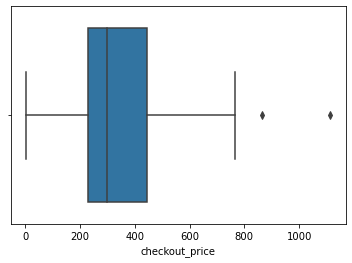

In [131]:
sns.boxplot(x=master['checkout_price'])

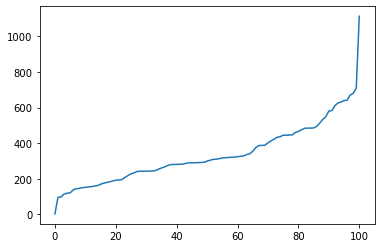

In [132]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master['checkout_price'].quantile(i/100))
    x.append(i)
plt.plot(x,quant)


In [133]:
quantile=np.array(quant)
quantile

array([   2.97 ,   96.03 ,   98.   ,  114.52 ,  119.34 ,  121.28 ,
        137.74 ,  144.53 ,  146.53 ,  150.35 ,  152.32 ,  154.26 ,
        156.2  ,  160.05 ,  162.05 ,  169.75 ,  175.6  ,  179.51 ,
        183.33 ,  188.18 ,  192.12 ,  194.03 ,  195.97 ,  207.61 ,
        218.31 ,  228.01 ,  233.83 ,  241.53 ,  242.5  ,  242.53 ,
        243.5  ,  243.53 ,  244.5  ,  246.44 ,  254.14 ,  260.93 ,
        266.75 ,  274.54 ,  280.33 ,  280.33 ,  281.33 ,  282.33 ,
        282.33 ,  287.138,  290.03 ,  290.03 ,  291.03 ,  291.03 ,
        292.03 ,  292.97 ,  299.76 ,  304.64 ,  309.43 ,  310.43 ,
        313.31 ,  317.22 ,  319.13 ,  320.13 ,  321.13 ,  322.07 ,
        324.04 ,  326.89 ,  328.89 ,  336.59 ,  340.5  ,  355.08 ,
        375.45 ,  387.03 ,  388.03 ,  389.03 ,  402.55 ,  413.25 ,
        422.95 ,  433.59 ,  436.53 ,  445.23 ,  445.26 ,  446.23 ,
        447.23 ,  460.75 ,  466.63 ,  475.33 ,  484.03 ,  485.03 ,
        485.03 ,  486.03 ,  494.73 ,  513.13 ,  533.53 ,  549.

In [134]:
master.checkout_price.loc[(master.checkout_price>=730)]=730

E:\anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### 3 op_price

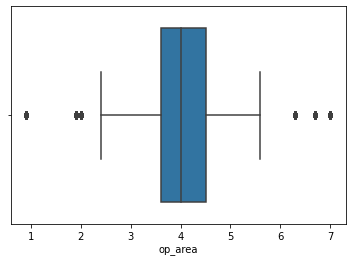

In [135]:
sns.boxplot(x=master["op_area"])

[0.9 1.9 2.  2.  2.4 2.7 2.7 2.7 2.8 2.8 2.8 2.8 2.8 2.8 2.9 3.  3.  3.2
 3.4 3.4 3.4 3.4 3.5 3.5 3.6 3.6 3.6 3.7 3.7 3.8 3.8 3.8 3.8 3.8 3.8 3.8
 3.8 3.8 3.9 3.9 3.9 3.9 3.9 3.9 3.9 3.9 3.9 3.9 4.  4.  4.  4.  4.  4.
 4.  4.  4.  4.  4.  4.  4.1 4.1 4.1 4.1 4.1 4.2 4.2 4.2 4.4 4.4 4.4 4.4
 4.4 4.5 4.5 4.5 4.5 4.5 4.5 4.6 4.7 4.7 4.8 4.8 4.8 4.8 5.  5.1 5.1 5.1
 5.3 5.6 5.6 6.3 6.7 6.7 7.  7.  7.  7.  7. ]


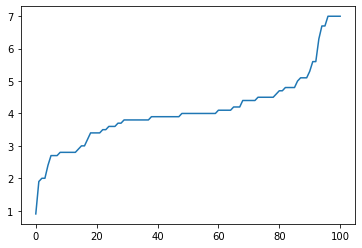

In [136]:
i=1
x=[]
quant=[]
for i in range(101):
    quant.append(master['op_area'].quantile(i/100))
    x.append(i)
quantile=np.array(quant)
print(quantile)
plt.plot(x,quant)


In [137]:
master.head()

,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,136.83,152.29,0,0,177.0,647,56_A,TYPE_C,2.0,Beverages,Thai
1,135.83,152.29,0,0,323.0,647,56_A,TYPE_C,2.0,Beverages,Thai
2,132.92,133.92,0,0,96.0,647,56_A,TYPE_C,2.0,Beverages,Thai
3,135.86,134.86,0,0,163.0,647,56_A,TYPE_C,2.0,Beverages,Thai
4,146.50,147.50,0,0,215.0,647,56_A,TYPE_C,2.0,Beverages,Thai


## Scaling

In [138]:
from sklearn.preprocessing import StandardScaler
mnx=StandardScaler()
new= pd.DataFrame(mnx.fit_transform(master[["checkout_price","base_price","op_area"]]), columns=[\
'checkout_price1', 'base_price1',"op_area1"])
new

,checkout_price1,base_price1,op_area1
0,-1.281992,-1.260633,-1.908018
1,-1.288533,-1.260633,-1.908018
2,-1.307566,-1.375294,-1.908018
3,-1.288336,-1.369427,-1.908018
4,-1.218742,-1.290531,-1.908018
...,...,...,...
489116,1.636503,1.415452,0.381019
489117,1.629962,1.421694,0.381019
489118,1.940649,1.718176,0.381019
489119,1.940649,1.718176,0.381019


In [139]:
master=pd.concat([master,new], axis=1)

In [140]:
master=master.drop(["checkout_price","base_price","op_area"], axis=1)

In [141]:
master.head()

,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,category,cuisine,checkout_price1,base_price1,op_area1
0,0,0,177.0,647,56_A,TYPE_C,Beverages,Thai,-1.281992,-1.260633,-1.908018
1,0,0,323.0,647,56_A,TYPE_C,Beverages,Thai,-1.288533,-1.260633,-1.908018
2,0,0,96.0,647,56_A,TYPE_C,Beverages,Thai,-1.307566,-1.375294,-1.908018
3,0,0,163.0,647,56_A,TYPE_C,Beverages,Thai,-1.288336,-1.369427,-1.908018
4,0,0,215.0,647,56_A,TYPE_C,Beverages,Thai,-1.218742,-1.290531,-1.908018


## Dummies

In [142]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   emailer_for_promotion  489121 non-null  int64  
 1   homepage_featured      489121 non-null  int64  
 2   num_orders             456548 non-null  float64
 3   city_code              489121 non-null  object 
 4   region_code            489121 non-null  object 
 5   center_type            489121 non-null  object 
 6   category               489121 non-null  object 
 7   cuisine                489121 non-null  object 
 8   checkout_price1        489121 non-null  float64
 9   base_price1            489121 non-null  float64
 10  op_area1               489121 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 35.5+ MB


In [143]:
master=pd.get_dummies(master, drop_first=True)

In [144]:
master.head()

,emailer_for_promotion,homepage_featured,num_orders,checkout_price1,base_price1,op_area1,city_code_461,city_code_473,city_code_478,city_code_485,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0,0,177.0,-1.281992,-1.260633,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,323.0,-1.288533,-1.260633,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,96.0,-1.307566,-1.375294,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,163.0,-1.288336,-1.369427,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,215.0,-1.218742,-1.290531,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Model Building

In [145]:
print(data.shape)
print(master.shape)

(456548, 9)
(489121, 81)


In [146]:
train=master[master.num_orders.isna()==False]
test=master[master.num_orders.isna()]

In [147]:
train

,emailer_for_promotion,homepage_featured,num_orders,checkout_price1,base_price1,op_area1,city_code_461,city_code_473,city_code_478,city_code_485,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0,0,177.0,-1.281992,-1.260633,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,323.0,-1.288533,-1.260633,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,96.0,-1.307566,-1.375294,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,163.0,-1.288336,-1.369427,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,215.0,-1.218742,-1.290531,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489111,0,1,13.0,1.636503,1.724418,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489112,0,0,42.0,1.623421,1.421694,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489113,0,0,40.0,1.636503,1.415452,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489114,0,0,53.0,1.629962,1.415452,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
test

,emailer_for_promotion,homepage_featured,num_orders,checkout_price1,base_price1,op_area1,city_code_461,city_code_473,city_code_478,city_code_485,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
145,0,0,NaN,-1.142804,-1.218064,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
146,0,0,NaN,-1.136263,-1.218064,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
147,0,0,NaN,-1.149149,-1.224119,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
148,0,0,NaN,-1.136067,-1.230361,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
149,0,0,NaN,-1.129723,-1.218064,-1.908018,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489116,0,0,NaN,1.636503,1.415452,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489117,0,1,NaN,1.629962,1.421694,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489118,0,0,NaN,1.940649,1.718176,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
489119,0,0,NaN,1.940649,1.718176,0.381019,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [149]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 489115
Data columns (total 81 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   emailer_for_promotion  456548 non-null  int64  
 1   homepage_featured      456548 non-null  int64  
 2   num_orders             456548 non-null  float64
 3   checkout_price1        456548 non-null  float64
 4   base_price1            456548 non-null  float64
 5   op_area1               456548 non-null  float64
 6   city_code_461          456548 non-null  uint8  
 7   city_code_473          456548 non-null  uint8  
 8   city_code_478          456548 non-null  uint8  
 9   city_code_485          456548 non-null  uint8  
 10  city_code_515          456548 non-null  uint8  
 11  city_code_517          456548 non-null  uint8  
 12  city_code_522          456548 non-null  uint8  
 13  city_code_526          456548 non-null  uint8  
 14  city_code_541          456548 non-nu

In [150]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 145 to 489120
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   emailer_for_promotion  32573 non-null  int64  
 1   homepage_featured      32573 non-null  int64  
 2   num_orders             0 non-null      float64
 3   checkout_price1        32573 non-null  float64
 4   base_price1            32573 non-null  float64
 5   op_area1               32573 non-null  float64
 6   city_code_461          32573 non-null  uint8  
 7   city_code_473          32573 non-null  uint8  
 8   city_code_478          32573 non-null  uint8  
 9   city_code_485          32573 non-null  uint8  
 10  city_code_515          32573 non-null  uint8  
 11  city_code_517          32573 non-null  uint8  
 12  city_code_522          32573 non-null  uint8  
 13  city_code_526          32573 non-null  uint8  
 14  city_code_541          32573 non-null  uint8  
 15 

In [151]:
xtrain=train.drop('num_orders', axis=1)
xtrain.head()

,emailer_for_promotion,homepage_featured,checkout_price1,base_price1,op_area1,city_code_461,city_code_473,city_code_478,city_code_485,city_code_515,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,0,0,-1.281992,-1.260633,-1.908018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,-1.288533,-1.260633,-1.908018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.307566,-1.375294,-1.908018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,-1.288336,-1.369427,-1.908018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,-1.218742,-1.290531,-1.908018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [152]:
ytrain=train.num_orders

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(xtrain,ytrain, test_size=0.30, random_state=10)

In [157]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(273928, 80)
(182620, 80)
(273928,)
(182620,)


## first model

In [160]:
X=X_train[['emailer_for_promotion',"homepage_featured"]]
X

,emailer_for_promotion,homepage_featured
267459,0,0
238269,0,0
466550,0,0
343237,0,0
55793,0,0
...,...,...
100062,0,0
475122,0,0
381616,0,0
253040,0,0


In [161]:
import statsmodels.api as sm
X_c = sm.add_constant(X)
lm_1 = sm.OLS(y_train,X).fit()
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             num_orders   R-squared (uncentered):                   0.218
Model:                            OLS   Adj. R-squared (uncentered):              0.218
Method:                 Least Squares   F-statistic:                          4.448e+04
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        02:59:24   Log-Likelihood:                     -2.3843e+06
No. Observations:              319583   AIC:                                  4.769e+06
Df Residuals:                  319581   BIC:                                  4.769e+06
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [165]:
X_train.columns

Index(['emailer_for_promotion', 'homepage_featured', 'checkout_price1',
       'base_price1', 'op_area1', 'city_code_461', 'city_code_473',
       'city_code_478', 'city_code_485', 'city_code_515', 'city_code_517',
       'city_code_522', 'city_code_526', 'city_code_541', 'city_code_553',
       'city_code_556', 'city_code_561', 'city_code_562', 'city_code_576',
       'city_code_577', 'city_code_579', 'city_code_590', 'city_code_593',
       'city_code_596', 'city_code_599', 'city_code_602', 'city_code_604',
       'city_code_609', 'city_code_614', 'city_code_615', 'city_code_620',
       'city_code_628', 'city_code_632', 'city_code_638', 'city_code_647',
       'city_code_648', 'city_code_649', 'city_code_651', 'city_code_654',
       'city_code_658', 'city_code_659', 'city_code_675', 'city_code_676',
       'city_code_680', 'city_code_683', 'city_code_685', 'city_code_693',
       'city_code_695', 'city_code_698', 'city_code_699', 'city_code_700',
       'city_code_702', 'city_code_

In [166]:
X=X_train[['emailer_for_promotion',"homepage_featured","op_area1","checkout_price1","base_price1"]]
X

,emailer_for_promotion,homepage_featured,op_area1,checkout_price1,base_price1
267459,0,0,2.670057,2.575104,2.336109
238269,0,0,-0.076788,-0.209959,-0.334109
466550,0,0,-0.534596,-0.083067,-0.219261
343237,0,0,0.381019,0.988966,0.810003
55793,0,0,-1.908018,-1.174527,-1.242095
...,...,...,...,...,...
100062,0,0,-1.175526,-0.908056,-1.000290
475122,0,0,0.381019,-0.654077,-0.757923
381616,0,0,-0.168350,0.494483,0.331885
253040,0,0,0.289458,-1.066669,-1.012212


In [167]:
import statsmodels.api as sm
X_c = sm.add_constant(X)
lm_1 = sm.OLS(y_train,X).fit()
print(lm_1.summary())

                                 OLS Regression Results                                
Dep. Variable:             num_orders   R-squared (uncentered):                   0.301
Model:                            OLS   Adj. R-squared (uncentered):              0.301
Method:                 Least Squares   F-statistic:                          2.758e+04
Date:                Wed, 12 Aug 2020   Prob (F-statistic):                        0.00
Time:                        03:02:09   Log-Likelihood:                     -2.3663e+06
No. Observations:              319583   AIC:                                  4.733e+06
Df Residuals:                  319578   BIC:                                  4.733e+06
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [181]:
X=X_train[['emailer_for_promotion',"homepage_featured",
       'region_code_85', 'region_code_93', 'region_code_56_A',
       'center_type_TYPE_B', 'center_type_TYPE_C', 'category_Biryani',
       'category_Desert', 'category_Extras', 'category_Fish',
       'category_Other Snacks', 'category_Pasta', 'category_Pizza',
       'category_Rice Bowl', 'category_Salad', 'category_Sandwich',
       'category_Seafood', 'category_Soup', 'category_Starters',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai']]
X

MemoryError: Unable to allocate 6.40 MiB for an array with shape (21, 319583) and data type uint8

In [179]:
import statsmodels.api as sm
X_c = sm.add_constant(X)
lm_1 = sm.OLS(y_train,X).fit()
print(lm_1.summary())

MemoryError: Unable to allocate 14.6 MiB for an array with shape (319583, 6) and data type float64

In [ ]:
X=X_train[['emailer_for_promotion', 'homepage_featured', 'checkout_price1',
        'op_area1',
       'city_code_478', 'city_code_485', 'city_code_515', 'city_code_517',
       
       'city_code_609', 'city_code_614', 'city_code_615', 'city_code_620',
       'city_code_628', 'city_code_632', 'city_code_638',
       'city_code_648', 'city_code_654',
       'city_code_658', 'city_code_675',
       'city_code_680', 'city_code_683', 'city_code_699', 'city_code_700',
       'city_code_702', 'city_code_703', 'city_code_713', 'city_code_679_A',
       'region_code_34', 'region_code_35', 'region_code_71', 'region_code_77',
       'region_code_85', 'region_code_93', 'region_code_56_A',
       'center_type_TYPE_B', 'category_Biryani',
       'category_Desert', 'category_Extras', 'category_Fish',
       'category_Other Snacks', 'category_Pasta', 'category_Pizza',
       'category_Rice Bowl', 'category_Sandwich',
       'category_Seafood', 'category_Soup', 'category_Starters',
       'cuisine_Indian', 'cuisine_Italian', 'cuisine_Thai']]